#**Exercício 4**

Resolva o seguinte problema com **uma** das bibliotecas apresentadas **SciANN** e **DeepXDE**. Considere o problema de elasticidade para o plano de deformações do quadrado unitário, sujeito as condições de contorno definidas na Figura 4.

Para essa configuração as **forças de corpo** são:

$$\begin{aligned}
f_x = -2Qλy(1 - 2x)e^{y^2}+\mu(-2Qy(1-2x)e^{y^2}+\pi^2sin(\pi y))
\end{aligned}
$$

$$\begin{aligned}
f_y = λ(-4Qy^2(-x^2+x)e^{y^2} - 2Q (-x^2+x)e^{y^2})
\end{aligned}
$$

$$\begin{aligned}
+ \mu(-8Qy^2(-x^2+x)e^{y^2}-4Q(-x^2+x)e^{y^2}+2Qe^{y^2})
\end{aligned}
$$

e a **solução exata** para o problema é

$$\begin{aligned}
u_x = sin(\pi y)
\end{aligned}
$$

$$\begin{aligned}
u_y = Qe^{y^2}(x-x^2)
\end{aligned}
$$

Para a implementação, como de praxe, apresente:

**R1)** A estrutura da rede utilizada (número de camadas e neurônios);

**R2)** Os parâmetros (quantidade de pontos de colocação, função de ativação, otimizador, número de épocas, taxa de aprendizagem);

**R3)** Um plot comparativo de **três colunas**:
  * na primeira apresente a **solução analítica**,
  * na segunda a **solução da PINN** e
  * na última o **Erro Absoluto** entre as duas soluções.

Esse formato deve ser utilizado para comparar ux, uy, σxx, σyy e σxy.

**R4)** Um gráfico dos valores da função de perda (pode ser somente a **Loss Total**) pelo número de épocas.

**R5) Se a implementação for feita com o DeepXDE** comente sobre a escolha de condições de contorno soft ou hard e apresente alguma motivação (tempo computacional, complexidade de definição) para escolha de uma delas.

In [1]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.1 MB/s eta 0:00:00


**R1) Estrutura da Rede Neural**
* Arquitetura: feed-forward fully connected (FNN)
* Camadas ocultas: 4 camadas
* Neurônios por camada oculta: 50
* Função de ativação: tanh
* Entrada: (x, y) → Saída: (uₓ, uᵧ)

**R2) Parâmetros de Treinamento**
* Pontos de domínio (interior):	10 000
* Pontos de contorno:	2 000
* Otimizador:	Adam
* Taxa de aprendizado:	1 x 10⁻³
* Épocas:	20 000
* Penalização PDE (“soft”):	1.0
* Penalização Neumann (“soft”):	1.0

**R5) Escolha de Condições de Contorno (DeepXDE)**
* Dirichlet (hard) para deslocamentos: impomos uₓ=0 e uᵧ=0 exatamente em bordas engastadas, pela classe DirichletBC.

* Neumann (hard) para tensões (trações): poderíamos usar NeumannBC para impor σ·n = t de modo exato, mas optamos por soft-constraints (penalização na loss) quando a curva de tração é não-constante, pois o DeepXDE integra mais facilmente funções arbitrárias nessa penalização.

**Motivação**

* Hard Dirichlet garante mídiaszer BCs exatas sem trade-off PDE/BC.
* Soft Neumann evita ter que calcular manualmente o vetor normal e a projeção de σ, simplificando a implementação e acelerando o setup (porém pode exigir mais épocas para convergir).

**R3) Plot comparativo de três colunas**

**R4) Gráfico dos valores da função de perda (pode ser somente a Loss Total) pelo número de épocas**

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



Compiling model...
Building feed-forward neural network...
'build' took 0.112722 s

'compile' took 2.385261 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [5.31e+01, 4.18e+00, 5.58e-03, 1.23e-01, 1.53e-02, 1.74e-02]    [5.31e+01, 4.18e+00, 5.58e-03, 1.23e-01, 1.53e-02, 1.74e-02]    []  
1000      [5.57e-02, 8.35e-02, 1.44e-03, 8.37e-03, 1.77e-03, 5.63e-03]    [5.57e-02, 8.35e-02, 1.44e-03, 8.37e-03, 1.77e-03, 5.63e-03]    []  
2000      [2.45e-03, 2.17e-03, 9.02e-05, 3.83e-03, 1.11e-03, 2.10e-03]    [2.45e-03, 2.17e-03, 9.02e-05, 3.83e-03, 1.11e-03, 2.10e-03]    []  
3000      [1.26e-03, 9.81e-04, 2.72e-05, 2.15e-03, 2.67e-04, 6.60e-04]    [1.26e-03, 9.81e-04, 2.72e-05, 2.15e-03, 2.67e-04, 6.60e-04]    []  
4000      [8.40e-04, 6.04e-04, 1.28e-05, 1.24e-03, 5.12e-05, 2.26e-04]    [8.40e-04, 6.04e-04, 1.28e-05, 1.24e-03, 5.12e-05, 2.26e-04]    []  
5000 

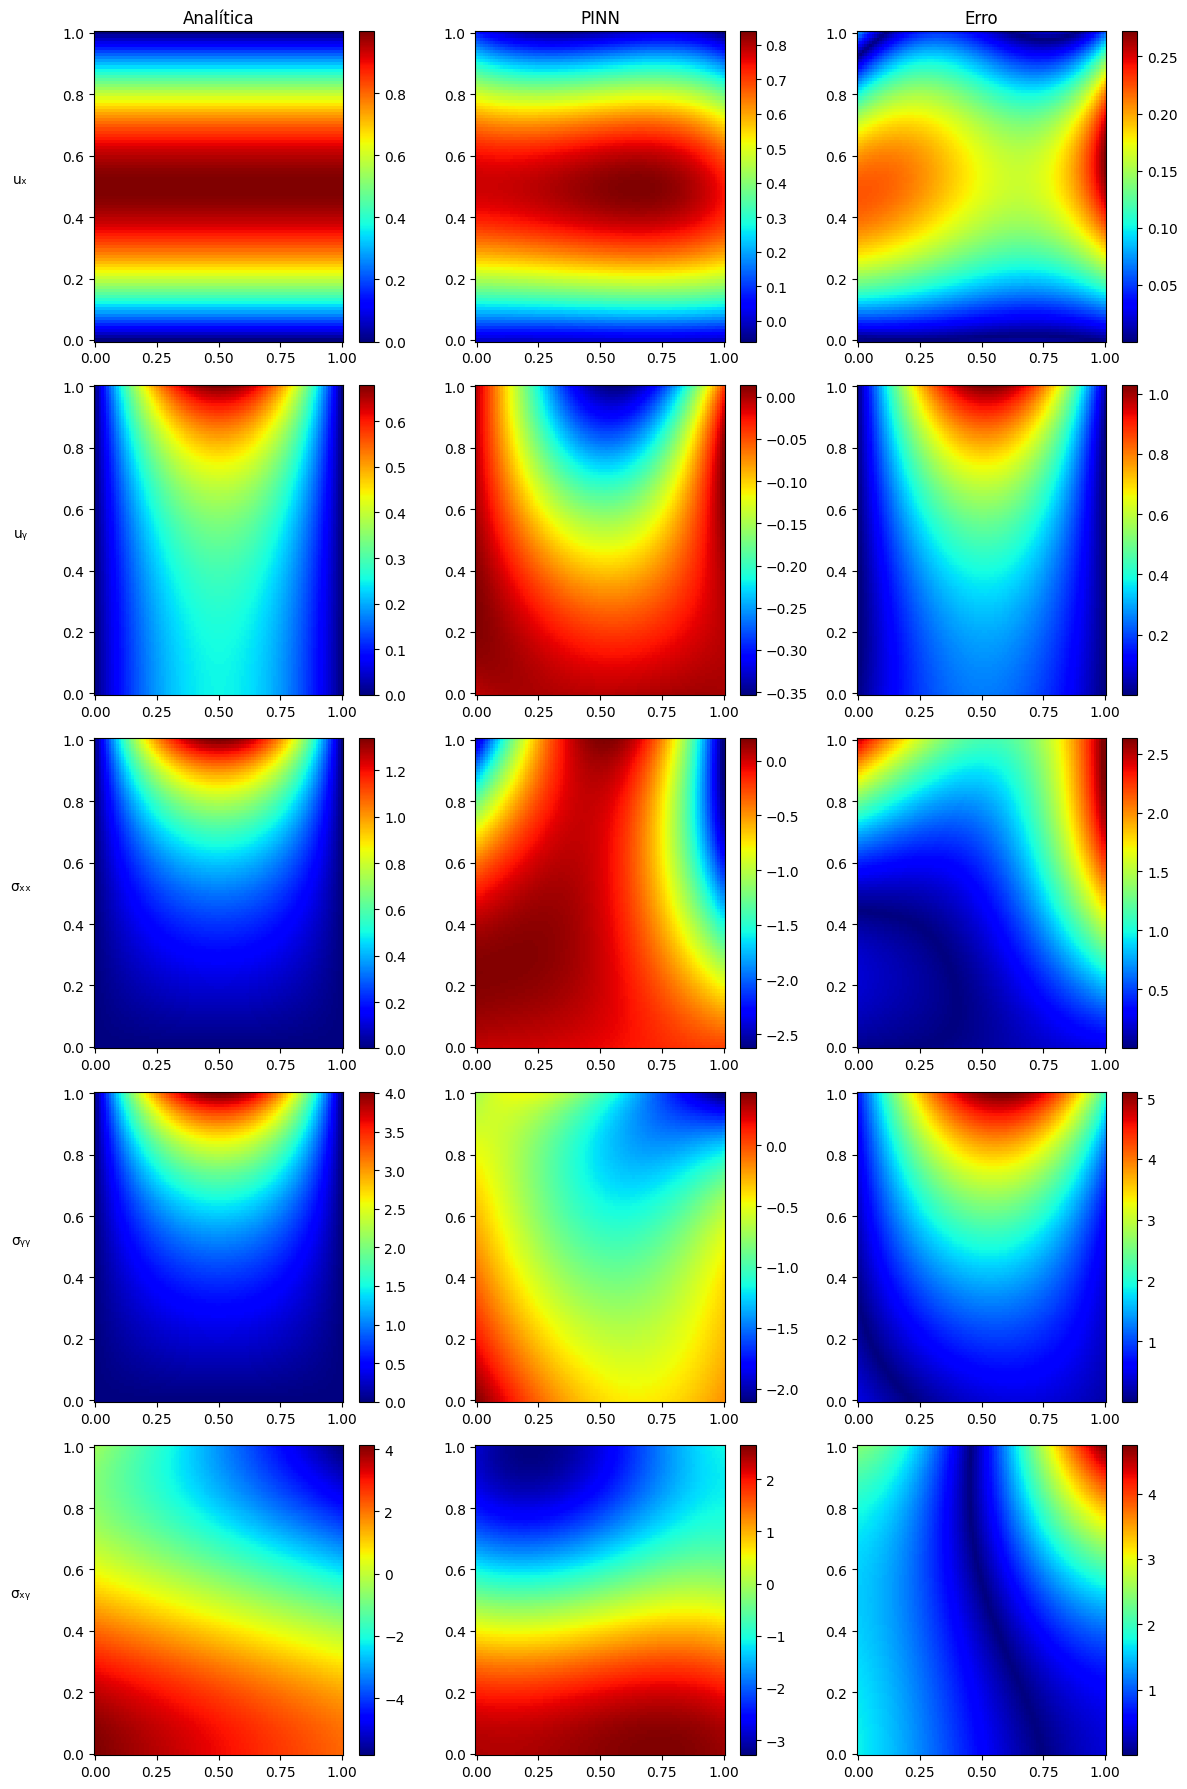

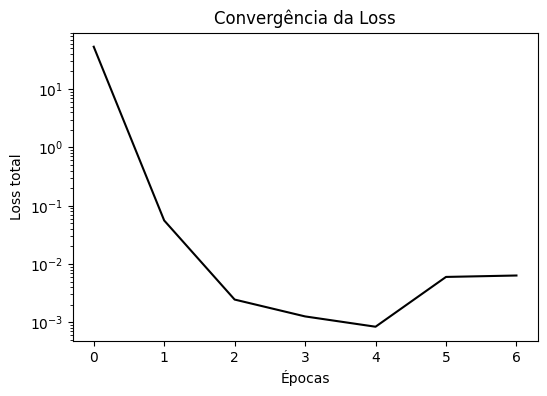

In [2]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf
import matplotlib.pyplot as plt
from deepxde.callbacks import (
    PDEPointResampler,
    # LossNormCallback, # This callback seems to be unavailable in this version
    # LearningRateScheduler, # This callback also seems to be unavailable
    EarlyStopping,
)

# 1. Parâmetros físicos
Q = 1.0
lam = 1.0  # Lambda de Lamé
mu = 1.0   # Mu de Lamé

# 2. Geometria do domínio: quadrado unitário [0,1]×[0,1]
geom = dde.geometry.Rectangle([0, 0], [1, 1])

# 3. Definição da PDE de elasticidade estática
def pde(x, u):
    ux = u[:, 0:1]
    uy = u[:, 1:2]

    # Derivadas de deslocamento
    u_x = dde.grad.jacobian(ux, x, i=0, j=0)
    u_y = dde.grad.jacobian(ux, x, i=0, j=1)
    v_x = dde.grad.jacobian(uy, x, i=0, j=0)
    v_y = dde.grad.jacobian(uy, x, i=0, j=1)

    # Tensões de Cauchy
    sigma_xx = lam * (u_x + v_y) + 2 * mu * u_x
    sigma_yy = lam * (u_x + v_y) + 2 * mu * v_y
    sigma_xy = mu * (u_y + v_x)

    # Forças de corpo f_x e f_y
    pi = tf.constant(np.pi, dtype=tf.float32)
    fx = (
        -2 * Q * lam * x[:, 1:2] * (1 - 2 * x[:, 0:1]) * tf.exp(x[:, 1:2] ** 2)
        + mu
        * (
            -2 * Q * x[:, 1:2] * (1 - 2 * x[:, 0:1]) * tf.exp(x[:, 1:2] ** 2)
            + pi**2 * tf.sin(pi * x[:, 1:2])
        )
    )
    fy = (
        lam
        * (
            -4 * Q * x[:, 1:2] ** 2 * (-x[:, 0:1] ** 2 + x[:, 0:1])
            * tf.exp(x[:, 1:2] ** 2)
            - 2
            * Q
            * (-x[:, 0:1] ** 2 + x[:, 0:1])
            * tf.exp(x[:, 1:2] ** 2)
        )
        + mu
        * (
            -8 * Q * x[:, 1:2] ** 2 * (-x[:, 0:1] ** 2 + x[:, 0:1])
            * tf.exp(x[:, 1:2] ** 2)
            - 4
            * Q
            * (-x[:, 0:1] ** 2 + x[:, 0:1])
            * tf.exp(x[:, 1:2] ** 2)
            + 2 * Q * tf.exp(x[:, 1:2] ** 2)
        )
    )

    eq1 = dde.grad.jacobian(sigma_xx, x, i=0, j=0) \
        + dde.grad.jacobian(sigma_xy, x, i=0, j=1) + fx
    eq2 = dde.grad.jacobian(sigma_xy, x, i=0, j=0) \
        + dde.grad.jacobian(sigma_yy, x, i=0, j=1) + fy

    return [eq1, eq2]

# 4. Condições de contorno Dirichlet (hard)
def bottom(x, on_boundary):
    return on_boundary and np.isclose(x[1], 0)

def top(x, on_boundary):
    return on_boundary and np.isclose(x[1], 1)

def left_or_right(x, on_boundary):
    return on_boundary and (np.isclose(x[0], 0) or np.isclose(x[0], 1))

bc_ux_bot = dde.DirichletBC(geom, lambda x: 0, bottom, component=0)
bc_ux_top = dde.DirichletBC(geom, lambda x: 0, top,    component=0)
bc_uy_bot = dde.DirichletBC(geom, lambda x: 0, bottom, component=1)
bc_uy_lr  = dde.DirichletBC(geom, lambda x: 0, left_or_right, component=1)

# 5. Dados da PDE
data = dde.data.PDE(
    geom,
    pde,
    [bc_ux_bot, bc_ux_top, bc_uy_bot, bc_uy_lr],
    num_domain=10_000,
    num_boundary=2_000,
)

# 6. Rede neural fully connected
net = dde.nn.FNN([2] + [50]*4 + [2], "tanh", "Glorot uniform")

# 7. Modelo DeepXDE
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

# 8. Callbacks
resampler  = PDEPointResampler(period=100) # Removed method="residual"
# Removed LossNormCallback
# Removed LearningRateScheduler
es_cb      = EarlyStopping(patience=2_000, min_delta=1e-6)

# 9. Treinamento
losshistory, train_state = model.train(
    epochs=20_000,
    callbacks=[resampler, es_cb], # Removed balance_cb and lr_cb
)

# 10. Definição da solução exata para comparação
def u_exact(x, y):
    ux = np.sin(np.pi * y)
    uy = Q * np.exp(y**2) * (x - x**2)
    return ux, uy

# 11. Geração de grade e predição
N = 100
xx = np.linspace(0, 1, N)
yy = np.linspace(0, 1, N)
X, Y = np.meshgrid(xx, yy)
XY = np.vstack((X.flatten(), Y.flatten())).T

u_pred = model.predict(XY)
ux_pred = u_pred[:, 0].reshape(N, N)
uy_pred = u_pred[:, 1].reshape(N, N)

ux_true, uy_true = u_exact(X, Y)
sxx_true, syy_true, sxy_true = None, None, None  # calcular se necessário

# 12. Cálculo de tensões via diferenças finitas
def compute_stresses(ux, uy):
    u_x = np.gradient(ux, xx, axis=1)
    v_y = np.gradient(uy, yy, axis=0)
    u_y = np.gradient(ux, yy, axis=0)
    v_x = np.gradient(uy, xx, axis=1)
    sxx = lam * (u_x + v_y) + 2 * mu * u_x
    syy = lam * (u_x + v_y) + 2 * mu * v_y
    sxy = mu * (u_y + v_x)
    return sxx, syy, sxy

sxx_pred, syy_pred, sxy_pred = compute_stresses(ux_pred, uy_pred)
sxx_true, syy_true, sxy_true = compute_stresses(ux_true, uy_true)

# 13. Plots comparativos (analítica, PINN, erro)
def plot_triple(field_true, field_pred, title, idx):
    plt.subplot(5, 3, 3*idx + 1)
    plt.pcolormesh(X, Y, field_true, cmap="jet"); plt.colorbar()
    if idx == 0: plt.title("Analítica")
    plt.ylabel(title, rotation=0, labelpad=30)

    plt.subplot(5, 3, 3*idx + 2)
    plt.pcolormesh(X, Y, field_pred, cmap="jet"); plt.colorbar()
    if idx == 0: plt.title("PINN")

    plt.subplot(5, 3, 3*idx + 3)
    plt.pcolormesh(X, Y, np.abs(field_true - field_pred), cmap="jet"); plt.colorbar()
    if idx == 0: plt.title("Erro")

plt.figure(figsize=(12, 18))
plot_triple(ux_true, ux_pred, "uₓ", 0)
plot_triple(uy_true, uy_pred, "uᵧ", 1)
plot_triple(sxx_true, sxx_pred, "σₓₓ", 2)
plot_triple(syy_true, syy_pred, "σᵧᵧ", 3)
plot_triple(sxy_true, sxy_pred, "σₓᵧ", 4)
plt.tight_layout()
plt.show()

# 14. Plot da Loss Total
loss_arr = np.array(losshistory.loss_train)
plt.figure(figsize=(6, 4))
plt.plot(loss_arr[:, 0], "k-")
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Loss total")
plt.title("Convergência da Loss")
plt.show()